In [85]:
% matplotlib inline
import os
os.chdir('/home/jagust/dino/surf/')
from surf import *

In [258]:
# Load PiB Data
pos_pib_dat = np.load('/home/jagust/dino/surf/mats/pos_pib_mat.npy')
neg_pib_dat = np.load('/home/jagust/dino/surf/mats/neg_pib_mat.npy')

# Transform values to z-scores
for r in range(len(pos_pib_dat)):
    mean, std = np.mean(pos_pib_dat[r]), np.std(pos_pib_dat[r])
#     print r, mean, std
    pos_pib_dat[r] = [((val - mean) * 1.0 / std) for val in pos_pib_dat[r]]

    
for r in range(len(neg_pib_dat)):
    mean, std = np.mean(neg_pib_dat[r]), np.std(neg_pib_dat[r])
    neg_pib_dat[r] = [((val - mean) * 1.0 / std) for val in neg_pib_dat[r]]

In [157]:
pos_pib_dat.shape

(38, 80)

In [106]:
reg_results = {}
for reg in range(80):

    pos_vals = pos_pib_dat[:,reg:reg+1]
    neg_vals = neg_pib_dat[:,reg:reg+1]
    
    pos_list = [float(i[0]) for i in pos_vals if i == i]
    neg_list = [float(i[0]) for i in neg_vals if i == i]
    t, p = stats.ttest_ind(pos_list, neg_list)
    
    reg_results[reg] = (t, p)

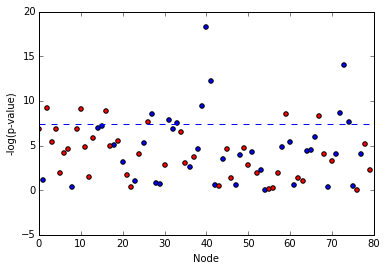

In [130]:
import math

reg_results

fig = plt.figure()
ax = fig.add_subplot(111)
p_vals_pos_greater = [] 
p_vals_neg_greater = []
for reg in range(80):
    if reg_results[reg][0] > 0.0:
        p_vals_pos_greater.append((reg, reg_results[reg][1]))
    else:
        p_vals_neg_greater.append((reg, reg_results[reg][1]))

xp, yp = zip(*p_vals_pos_greater)
ax.scatter(xp, [-1.0 * math.log(p) for p in yp], c = 'b')

xn, yn = zip(*p_vals_neg_greater)
ax.scatter(xn, [-1.0 * math.log(p) for p in yn], c = 'r')

ax.plot([0, 80], [7.37, 7.37] , 'b--', label = '')

plt.xlim(0, 80)
plt.ylabel('-log(p-value)')
plt.xlabel('Node')

In [271]:
reg_names = np.genfromtxt('/home/jagust/graph/scripts/fs_gm.csv', delimiter=',', dtype = str)
reg_names = reg_names[:, 0:1]
np.save('/home/jagust/dino/surf/reg_names.npy', reg_names)
def reg_name(reg):
    return reg_names[reg]

In [155]:
print "Regions where E4 Carriers have more PiB"
for pair in p_vals_pos_greater:
    if -1.0 * math.log(pair[1]) > -1.0 * math.log(0.05/80.0):
        print pair[0], pair [1], reg_name(pair[0])
print ""
print ""
# print "Regions where E4 Negative subjects have more PiB"
# for pair in p_vals_neg_greater:
#     if -1.0 * math.log(pair[1]) > -1.0 * math.log(0.05/80.0):
#         print pair[0], pair [1], reg_name(pair[0])

Regions where E4 Carriers have more PiB
27 0.000200918453279 ['ctx-lh-parahippocampal']
31 0.000391750849981 ['ctx-lh-parstriangularis']
33 0.000511848494801 ['ctx-lh-postcentral']
39 8.10327882124e-05 ['ctx-lh-superiorfrontal']
40 1.19463325497e-08 ['ctx-lh-superiorparietal']
41 4.9311476117e-06 ['ctx-lh-superiortemporal']
72 0.000171280546072 ['ctx-rh-superiorfrontal']
73 7.88253336153e-07 ['ctx-rh-superiorparietal']
74 0.00050929132736 ['ctx-rh-superiortemporal']




In [156]:
incl_paths = np.load('/home/jagust/dino/surf/inclusion_mat_paths.npy')

In [160]:
pos_mat = np.load('/home/jagust/dino/surf/mats/pos_group_mat_med.npy')
neg_mat = np.load('/home/jagust/dino/surf/mats/neg_group_mat_med.npy')

pos_thr_mat, cost = util.threshold_adjacency_matrix(pos_mat, cost=0.20)
neg_thr_mat, cost = util.threshold_adjacency_matrix(neg_mat, cost=0.20)

In [235]:
pos_bin_g, pos_wg = nx.Graph(pos_thr_mat), nx.Graph(pos_mat)
neg_bin_g, neg_wg = nx.Graph(neg_thr_mat), nx.Graph(neg_mat)


In [263]:
neg_bc_pts, neg_deg_pts, neg_cc_pts, pos_bc_pts, pos_deg_pts, pos_cc_pts = [], [], [], [], [], []
neg_bc, pos_bc = nx.betweenness_centrality(neg_bin_g), nx.betweenness_centrality(pos_bin_g)
neg_deg, pos_deg = neg_bin_g.degree().values(), pos_bin_g.degree().values()
neg_cc, pos_cc = nx.clustering(neg_bin_g), nx.clustering(pos_bin_g)
for reg in range(80):
    pos_vals = pos_pib_dat[:,reg:reg+1]
    neg_vals = neg_pib_dat[:,reg:reg+1]
    
    pos_list = [float(i[0]) for i in pos_vals if i == i]
    neg_list = [float(i[0]) for i in neg_vals if i == i]
    
    pos_mean = np.mean(pos_list)
    neg_mean = np.mean(neg_list)
    
    neg_bc_pts.append((neg_mean, neg_bc[reg]))
    pos_bc_pts.append((pos_mean, pos_bc[reg]))
    
    neg_deg_pts.append((neg_mean, neg_deg[reg]))
    pos_deg_pts.append((pos_mean, pos_deg[reg]))
    
    neg_cc_pts.append((neg_mean, neg_cc[reg]))
    pos_cc_pts.append((pos_mean, pos_cc[reg]))

Positive - r: -0.0734870575566
Negative - r: 0.00204336323067


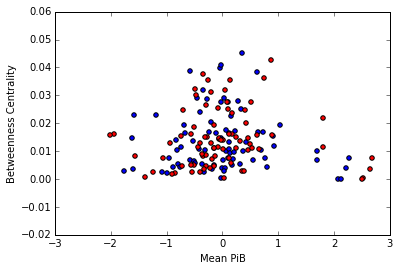

In [264]:
fig = plt.figure()
ax = fig.add_subplot(111)

xp, yp = zip(*pos_bc_pts)
ax.scatter(xp, yp, c = 'b')
print 'Positive - r: ' + str(stats.stats.pearsonr(xp, yp)[0])

xn, yn = zip(*neg_bc_pts)
ax.scatter(xn, yn, c = 'r')
print 'Negative - r: ' + str(stats.stats.pearsonr(xn, yn)[0])

plt.xlabel('Mean PiB')
plt.ylabel('Betweenness Centrality')

Positive - r: -0.10432202208
Negative - r: -0.0103212892753


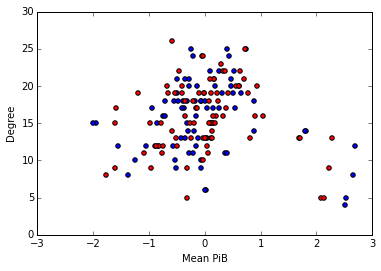

In [265]:
fig = plt.figure()
ax = fig.add_subplot(111)

xp, yp = zip(*neg_deg_pts)
ax.scatter(xp, yp, c = 'b')
print 'Positive - r: ' + str(stats.stats.pearsonr(xp, yp)[0])

xn, yn = zip(*pos_deg_pts)
ax.scatter(xn, yn, c = 'r')
print 'Negative - r: ' + str(stats.stats.pearsonr(xn, yn)[0])


plt.xlabel('Mean PiB')
plt.ylabel('Degree')

Positive - r: 0.224426506129
Negative - r: 0.12675841708
Overal correlation - r: 0.173331418066


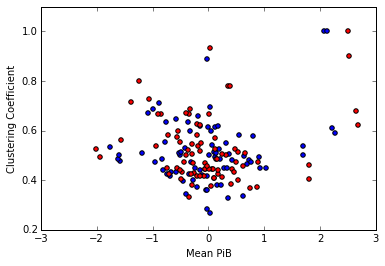

In [269]:
fig = plt.figure()
ax = fig.add_subplot(111)

xp, yp = zip(*pos_cc_pts)
ax.scatter(xp, yp, c = 'b')
print 'Positive - r: ' + str(stats.stats.pearsonr(xp, yp)[0])

xn, yn = zip(*neg_cc_pts)
ax.scatter(xn, yn, c = 'r')
print 'Negative - r: ' + str(stats.stats.pearsonr(xn, yn)[0])

print 'Overal correlation - r: ' + str(stats.stats.pearsonr(xn + xp, yn + yp)[0])

plt.xlabel('Mean PiB')
plt.ylabel('Clustering Coefficient')